<a href="https://colab.research.google.com/github/iamomtiwari/Twitter-Analysis/blob/main/AI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imorting Libraries

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
import itertools
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from keras.models import Sequential,Model
from keras.layers import Dense,LSTM, SpatialDropout1D, Embedding
from keras.utils.np_utils import to_categorical
from joblib import dump, load

# Reading the dataset

In [ ]:
text = []
clas = []
df = pd.read_csv('/kaggle/input/hate-speech-and-offensive-language-dataset/labeled_data.csv')
text = df['tweet'].tolist()
clas = df['class'].tolist()

# creating a new dataframe for easy text processing

In [ ]:
df = pd.DataFrame({'tweet': text, 'class': clas})

# Finding if there is any missing data

In [ ]:
print(df.isnull().sum())

tweet    0
class    0
dtype: int64


# Converting the data into lower case.

In [ ]:
df['tweet'] = df['tweet'].apply(lambda x:x.lower())

# removing punctuations

In [ ]:
punctuation_signs = list("?:!.,;")
df['tweet'] = df['tweet']

for punct_sign in punctuation_signs:
    df['tweet'] = df['tweet'].str.replace(punct_sign, '')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


# Removing '\n' and '\t', extra spaces, quoting text, and progressive pronouns.

In [ ]:
df['tweet'] = df['tweet'].apply(lambda x: x.replace('\n', ' '))
df['tweet'] = df['tweet'].apply(lambda x: x.replace('\t', ' '))
df['tweet'] = df['tweet'].str.replace("    ", " ")
df['tweet'] = df['tweet'].str.replace('"', '')
df['tweet'] = df['tweet'].str.replace("'s", "")

# removing stop-words

In [ ]:
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))
for stop_word in stop_words:
    regex_stopword = r"\b" + stop_word + r"\b"
    df['tweet'] = df['tweet'].str.replace(regex_stopword, '')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


# Using Bag of Words approach for final data Preparation.¶

In [ ]:
cv = CountVectorizer(max_features = 75)
X = cv.fit_transform(df['tweet']).toarray()
y = df['class']

# Splitting the Data using Stratified split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 42)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                              cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Converting the labels into categorical format

In [ ]:
y_train=to_categorical(y_train, num_classes = 3, dtype='float32')
y_test=to_categorical(y_test, num_classes = 3, dtype='float32')

# Creating and Training an LSTM Model

In [ ]:
model = Sequential()
model.add(Embedding(232337, 100, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(20, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 25
batch_size = 64

history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=epochs, batch_size=batch_size)

2022-07-01 00:26:52.068397: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-01 00:26:52.206880: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-01 00:26:52.207664: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-01 00:26:52.208799: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/25
272/272 [==============================] - 90s 320ms/step - loss: 0.4264 - accuracy: 0.7682 - val_loss: 0.4022 - val_accuracy: 0.7743
Epoch 2/25
272/272 [==============================] - 86s 317ms/step - loss: 0.4023 - accuracy: 0.7743 - val_loss: 0.4024 - val_accuracy: 0.7743
Epoch 3/25
272/272 [==============================] - 87s 320ms/step - loss: 0.4019 - accuracy: 0.7743 - val_loss: 0.4014 - val_accuracy: 0.7743
Epoch 4/25
272/272 [==============================] - 87s 319ms/step - loss: 0.4015 - accuracy: 0.7743 - val_loss: 0.4012 - val_accuracy: 0.7743
Epoch 5/25
272/272 [==============================] - 87s 320ms/step - loss: 0.4014 - accuracy: 0.7743 - val_loss: 0.4005 - val_accuracy: 0.7743
Epoch 6/25
272/272 [==============================] - 87s 318ms/step - loss: 0.4000 - accuracy: 0.7743 - val_loss: 0.3972 - val_accuracy: 0.7743
Epoch 7/25
272/272 [==============================] - 88s 324ms/step - loss: 0.3949 - accuracy: 0.7743 - val_loss: 0.3936 - val_ac

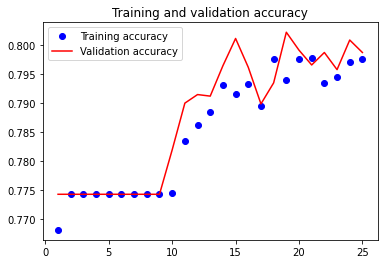

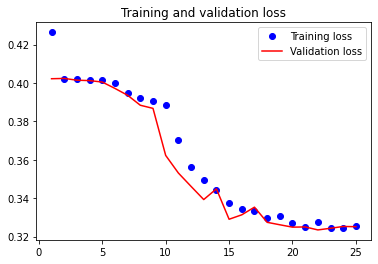

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Saving the LSTM Model

In [ ]:
model.save('lstm.h5')